# BÀI TẬP PHÂN TÍCH NHÂN TỐ

### Thực hiện phân tích nhân tố với số nhân tố bằng 10 trên các biến định lượng của bộ dữ liệu **_Hitters {ISLR}_** sau khi loại bỏ đi các quan sát chứa giá trị trống.

In [1]:
library(ISLR)

data = na.omit(Hitters)
head(data)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


#### a) Tìm ma trận tải trọng $L = (l_{ij})$.

In [2]:
data_numeric = data[sapply(data, is.numeric)]

In [3]:
library(psych)

fa = factanal(data_numeric, factors = 10)
fa$loadings


Loadings:
        Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8 Factor9
AtBat            0.925   0.256   0.120           0.168                         
Hits             0.953   0.196                   0.130                         
HmRun    0.148   0.489  -0.128   0.838           0.106                         
Runs             0.934           0.191   0.214                   0.114  -0.125 
RBI      0.189   0.710           0.539           0.272                         
Walks    0.211   0.576                   0.585   0.204                         
Years    0.929                                                  -0.117         
CAtBat   0.990   0.109                                                         
CHits    0.983   0.136                                                         
CHmRun   0.810   0.117  -0.151   0.332   0.115           0.414                 
CRuns    0.973   0.156                                                         
CRBI     0.950   0.118       

#### b) Nhân tố thứ nhất, thứ hai và thứ ba bị chi phối nhiều nhất bởi ba biến (tương ứng) nào?

Factor1: 'CAtBat'  
Factor2: 'Hits'  
Factor3: 'Assists'

#### c) Kiểm định xem việc sử dụng 10 nhân tố là đủ hay chưa?

In [4]:
factanal(data_numeric, 10)


Call:
factanal(x = data_numeric, factors = 10)

Uniquenesses:
  AtBat    Hits   HmRun    Runs     RBI   Walks   Years  CAtBat   CHits  CHmRun 
  0.005   0.005   0.005   0.005   0.083   0.229   0.097   0.005   0.005   0.005 
  CRuns    CRBI  CWalks PutOuts Assists  Errors  Salary 
  0.005   0.005   0.005   0.774   0.005   0.464   0.466 

Loadings:
        Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8 Factor9
AtBat            0.925   0.256   0.120           0.168                         
Hits             0.953   0.196                   0.130                         
HmRun    0.148   0.489  -0.128   0.838           0.106                         
Runs             0.934           0.191   0.214                   0.114  -0.125 
RBI      0.189   0.710           0.539           0.272                         
Walks    0.211   0.576                   0.585   0.204                         
Years    0.929                                                  -0.117         
CAtBat   0

H0: Sử dụng 10 nhân tố là đủ  
H1: Sử dụng 10 nhân tố là không đủ  
Do p-value < 0.05 $\Rightarrow$ Bác bỏ H0  
Có cơ sở để nói 10 nhân tố là không đủ

#### d) Vẽ đồ thị thể hiện sự chi phối của các biến lên nhân tố thứ hai và thứ ba. Dựa vào đồ thị, hãy cho biết nhân tố thứ ba bị chi phối bởi biến nào nhiều nhất.

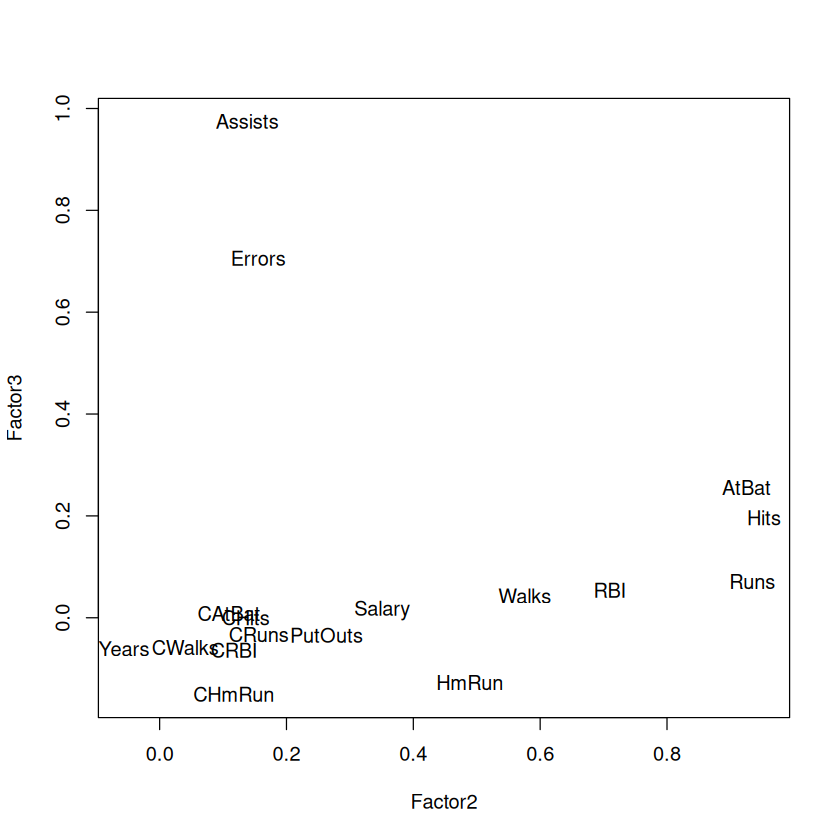

In [5]:
loads = fa$loadings[,2:3]
plot(loads, type ="n")
text(loads, labels = names(data_numeric))

Nhân tố thứ 3 bị chi phối bởi 'Assists' nhiều nhất.

#### e) Vẽ đồ thị trực quan hóa mô hình toàn bộ nhân tố. Dựa vào đồ thị, hãy cho biết những biến nào chi phối nhân tố thứ năm và thứ chín.

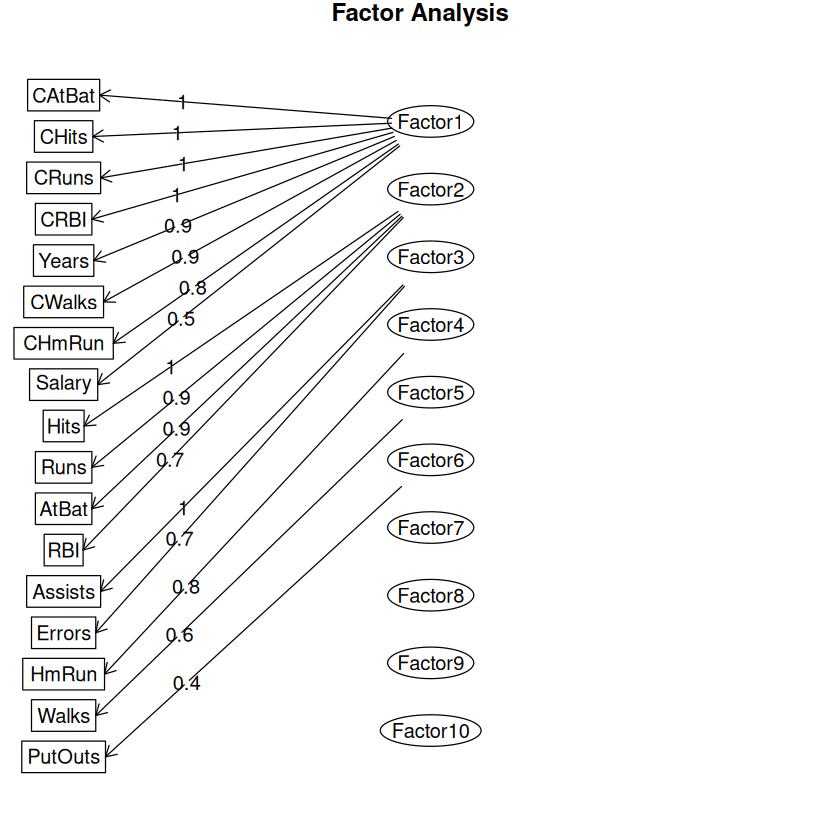

In [6]:
fa.diagram(fa$loadings)

Factor5: 'Walks'  
Factor9: Không bị chi phối

#### f) Kết quả ở ý e) có thay đổi khi chỉ vẽ đồ thị trực quan hóa mô hình gồm hai nhân tố 5 và 9 không?

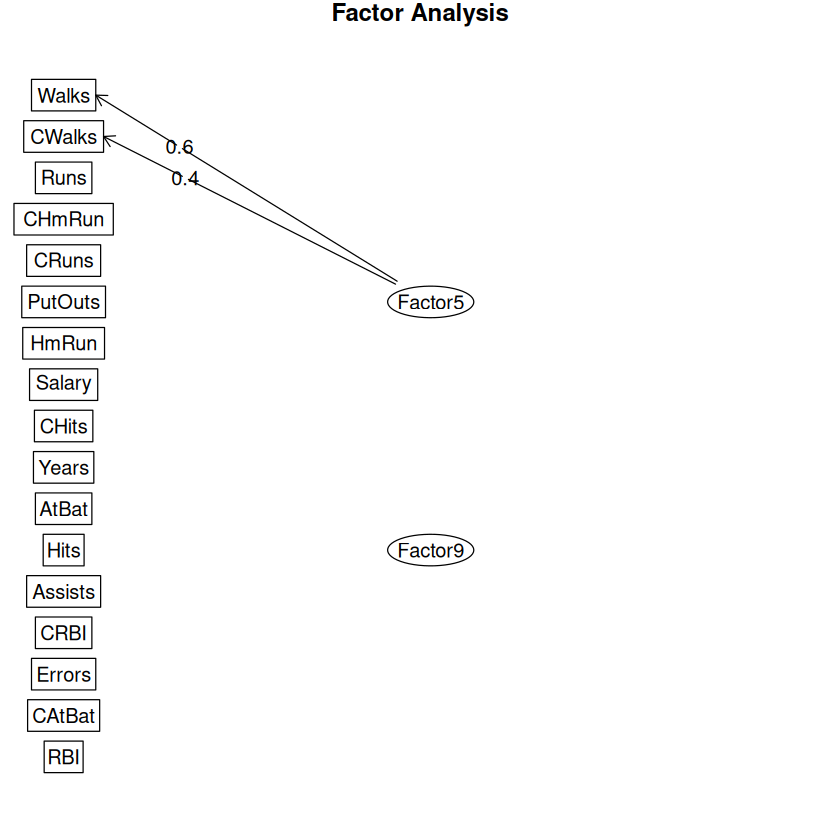

In [7]:
fa.diagram(fa$loadings[, c(5, 9)])

Factor5 chịu chi phối thêm bởi 'CWalks'.

#### g) Khi hệ số tải trọng $|l_{ij} | < 0.15$ thì ta cho rằng biến $X_i$ không chi phối nhân tố $F_j$. Viết lại ma trận tải trọng.

In [8]:
loads = fa$loadings
loads[abs(loads) < 0.15] = 0
loads


Loadings:
        Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8 Factor9
AtBat            0.925   0.256                   0.168                         
Hits             0.953   0.196                                                 
HmRun            0.489           0.838                                         
Runs             0.934           0.191   0.214                                 
RBI      0.189   0.710           0.539           0.272                         
Walks    0.211   0.576                   0.585   0.204                         
Years    0.929                                                                 
CAtBat   0.990                                                                 
CHits    0.983                                                                 
CHmRun   0.810          -0.151   0.332                   0.414                 
CRuns    0.973   0.156                                                         
CRBI     0.950               

#### h) Các biến chi phối $F_1$ có mối quan hệ chặt chẽ khi được sử dụng cùng nhau không?

In [9]:
load_1 = fa$loadings[, 1]
load_1 = load_1[load_1 >= 0.15]
load_1

RBI     Walks     Years    CAtBat     CHits    CHmRun     CRuns      CRBI 
0.1894581 0.2108291 0.9289711 0.9900202 0.9832500 0.8095199 0.9734282 0.9503041 
   CWalks    Salary 
0.9180502 0.4887283

In [10]:
cor_mat = cor(data[, names(load_1)])
cor_mat

,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary
RBI,1.0000000,0.5695048,0.1296679,0.2781259,0.2921371,0.4421897,0.3072262,0.3877766,0.2336188,0.4494571
Walks,0.5695048,1.0000000,0.1347927,0.2694500,0.2707951,0.3495822,0.3329766,0.3126968,0.4291399,0.4438673
Years,0.1296679,0.1347927,1.0000000,0.9156807,0.8978445,0.7223707,0.8766486,0.8638094,0.8375237,0.4006570
CAtBat,0.2781259,0.2694500,0.9156807,1.0000000,0.9950568,0.8016761,0.9827469,0.9507301,0.9067117,0.5261353
CHits,0.2921371,0.2707951,0.8978445,0.9950568,1.0000000,0.7866520,0.9845418,0.9467974,0.8907184,0.5489096
CHmRun,0.4421897,0.3495822,0.7223707,0.8016761,0.7866520,1.0000000,0.8256248,0.9279026,0.8108783,0.5249306
CRuns,0.3072262,0.3329766,0.8766486,0.9827469,0.9845418,0.8256248,1.0000000,0.9456770,0.9277685,0.5626777
CRBI,0.3877766,0.3126968,0.8638094,0.9507301,0.9467974,0.9279026,0.9456770,1.0000000,0.8891370,0.5669657
CWalks,0.2336188,0.4291399,0.8375237,0.9067117,0.8907184,0.8108783,0.9277685,0.8891370,1.0000000,0.4898220
Salary,0.4494571,0.4438673,0.4006570,0.5261353,0.5489096,0.5249306,0.5626777,0.5669657,0.4898220,1.0000000


corrplot 0.92 loaded



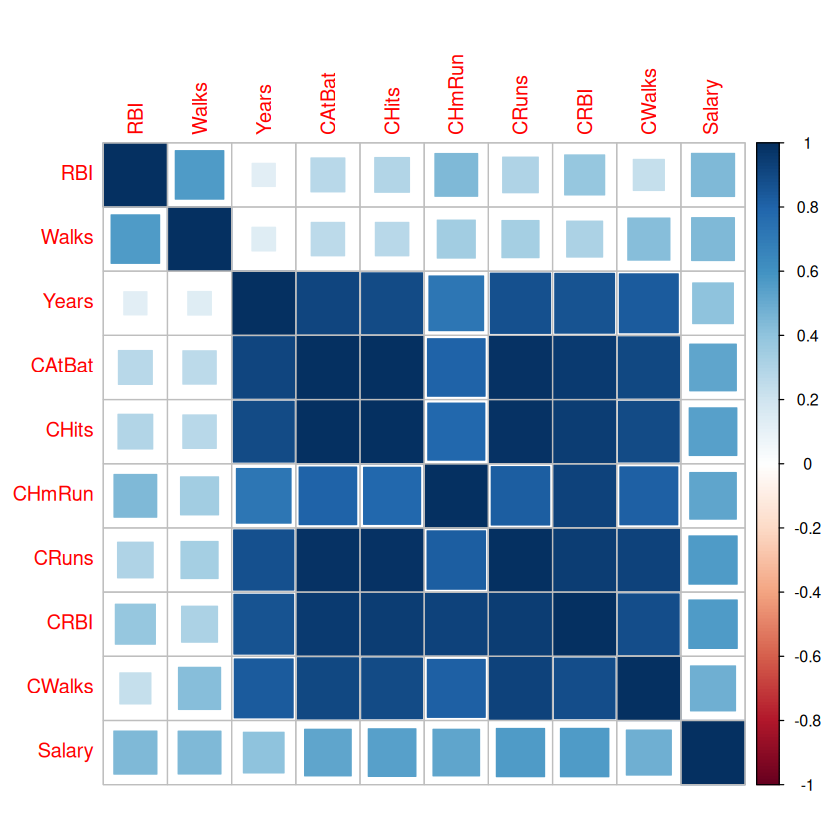

In [11]:
library(corrplot)

corrplot(cor_mat, method = 'square')

Các biến chi phối $F_1$ có mối quan hệ chặt chẽ khi được sử dụng cùng nhau.